# Python files that contains sklearn

### We search through all python files that are not a fork of sklearn (by repo_name and path), and count how many files contain 'sklearn' in the content.

In [3]:
%matplotlib notebook

In [241]:
from bigquery_python_framework.util import *
from bigquery_python_framework.InstantiationAnalyzer import InstantiationAnalyzer

In [5]:
from bigquery_python_framework.GithubPython import GithubPython
import matplotlib.pyplot as plt

In [37]:
allReposThatContainsSklearn = """\
SELECT
    UNIQUE(repo_name)
FROM
    [scikit-learn-research.pyfiles.content_py_full]
WHERE
    (path CONTAINS "sklearn") OR
    (repo_name CONTAINS "scikit-learn") OR
    (repo_name CONTAINS "sklearn") OR
    (path CONTAINS "scikit-learn")
"""
excludedRepos = [repo_name[0] for repo_name in run(allReposThatContainsSklearn)]

In [48]:
assert("jjx02230808/project0223" in excludedRepos)

In [38]:
def excludeByRepo(excludedRepos):
    if not excludedRepos:
        return ""
    s = '(NOT sample_repo_name CONTAINS "%s")' % excludedRepos[0]
    for repo in excludedRepos[1:]:
        s += ' AND '
        s += '(NOT sample_repo_name CONTAINS "%s")' % repo
    return s    

In [39]:
def excludeByRepoFull(excludeByRepos):
    if not excludedRepos:
        return ""
    s = '(NOT repo_name CONTAINS "%s")' % excludedRepos[0]
    for repo in excludedRepos[1:]:
        s += ' AND '
        s += '(NOT repo_name CONTAINS "%s")' % repo
    return s 

In [40]:
pythonFilesThatContainsSklearn = """\
SELECT
    COUNT(*) count 
FROM
    [scikit-learn-research.pyfiles.content_py]
WHERE
    %s AND (content CONTAINS "sklearn")
""" % excludeByRepo(excludedRepos)

In [41]:
result = run(pythonFilesThatContainsSklearn)

In [42]:
sklearnFile = result[0][0]
sklearnFile

31404

### How many python files in total?

In [43]:
howManyPythonFiles = """\
SELECT
    COUNT(*) count
FROM
    [scikit-learn-research.pyfiles.content_py]
WHERE
    %s
""" % excludeByRepo(excludedRepos)
totalFile = run(howManyPythonFiles)[0][0]

<IPython.core.display.Javascript object>


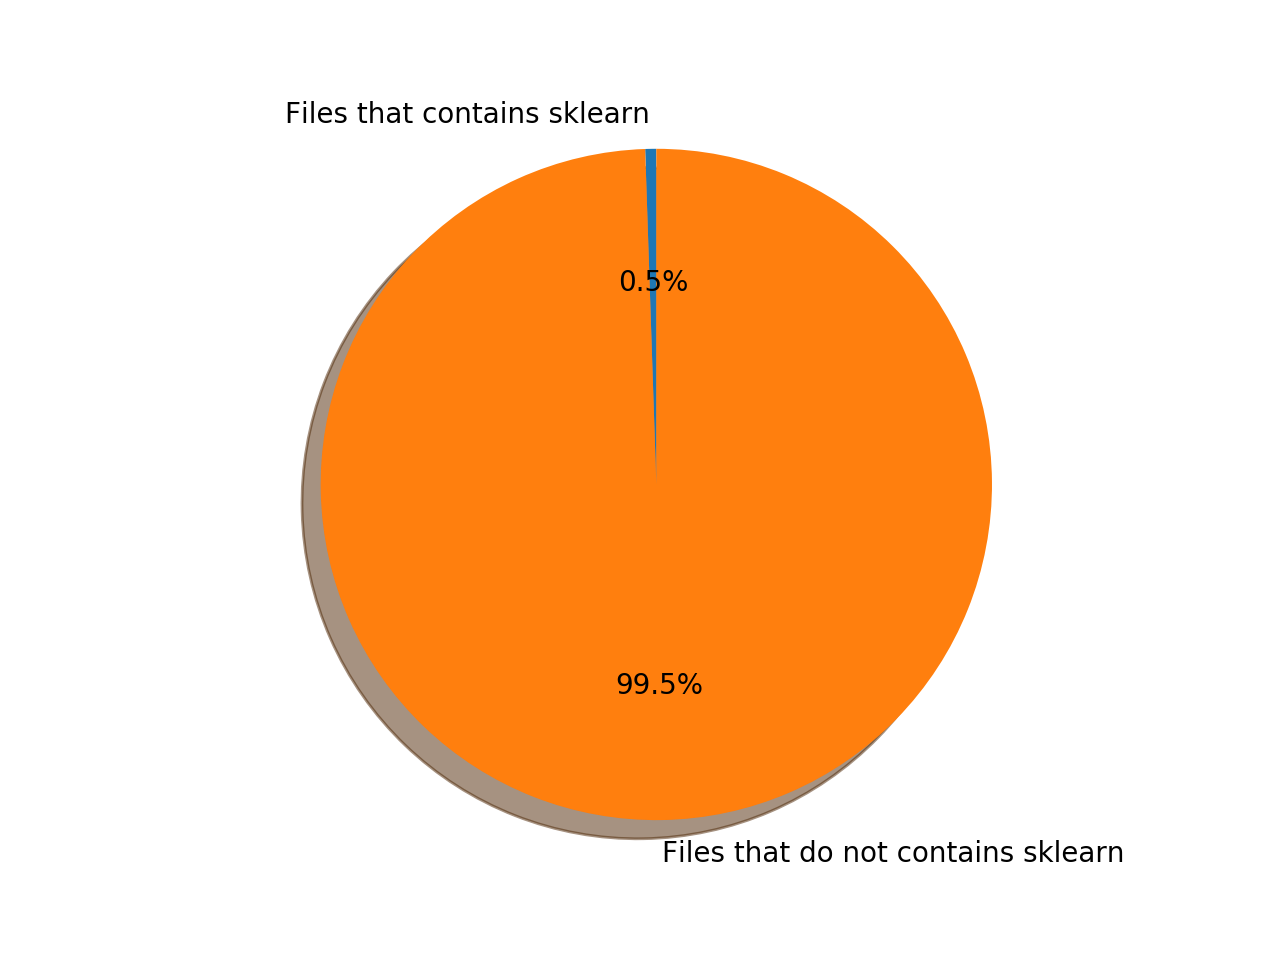

In [44]:
labels = 'Files that contains sklearn', 'Files that do not contains sklearn'
sizes = [sklearnFile, totalFile-sklearnFile]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Repo that imports sklearn the most

### The most is in terms of number of lines

In [45]:
repoThatImportsSklearnTheMostQuery = """\
SELECT
  repo_name,
  COUNT(*) count
FROM (
    SELECT
      SPLIT(content, '\n') line,
      repo_name
    FROM
      [scikit-learn-research.pyfiles.content_py_full]
    WHERE
      %s
    HAVING
      REGEXP_MATCH(line, r'from sklearn.*? import .+') OR
      REGEXP_MATCH(line, r'import sklearn')
)
GROUP BY
  1
ORDER BY
  count DESC
""" % excludeByRepoFull(excludedRepos)

repoThatImportsSklearnTheMost = run(repoThatImportsSklearnTheMostQuery)

<IPython.core.display.Javascript object>


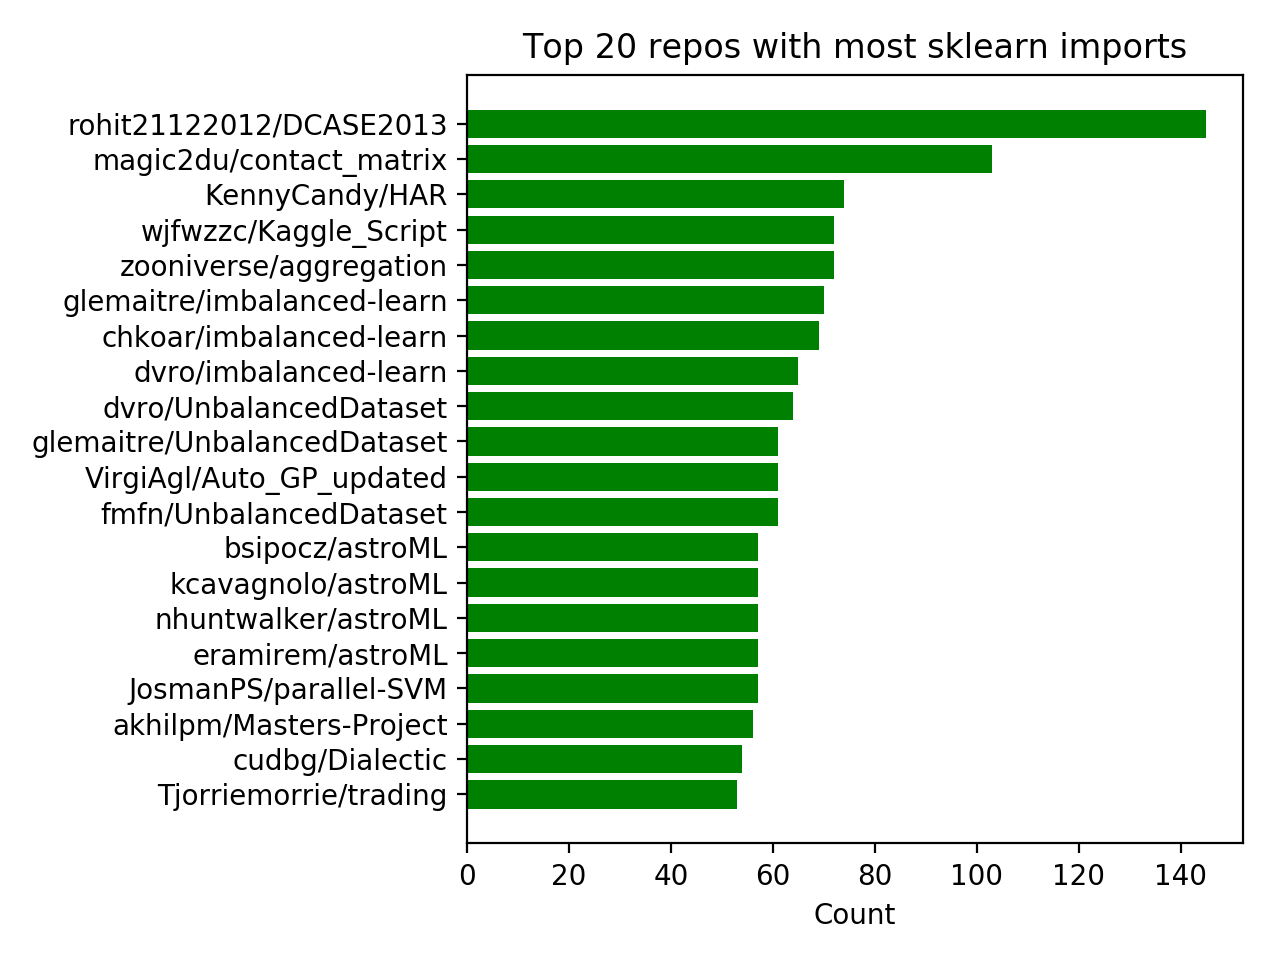

In [46]:
fig, ax = plt.subplots()

# Example data
repos = [repo for repo, _ in repoThatImportsSklearnTheMost[:20]]
y_pos = range(len(repos))
count = [count for _, count in repoThatImportsSklearnTheMost[:20]]

ax.barh(y_pos, count, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(repos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Top 20 repos with most sklearn imports')
plt.tight_layout()

## Detail look of files that import sklearn

In [49]:
repoAndPathThatImportsSklearnQuery = """\
SELECT
  repo_name,
  path
FROM (
    SELECT
      SPLIT(content, '\n') line,
      repo_name,
      path
    FROM
      [scikit-learn-research.pyfiles.content_py_full]
    WHERE
        %s
    HAVING
      REGEXP_MATCH(line, r'from sklearn.*? import .+') OR
      REGEXP_MATCH(line, r'import sklearn')
)
""" % excludeByRepoFull(excludedRepos)

repoAndPathThatImportsSklearn = run(repoAndPathThatImportsSklearnQuery)

### Below is a list of GitHub urls that import "sklearn"

In [50]:
getGithubURL(repoAndPathThatImportsSklearn)

https://github.com/alex-mitrevski/delta-execution-models/tree/master/rule_learner/geometric_learner.py
https://github.com/sampathweb/cs109_twitterapp/tree/master/app/twitterword.py
https://github.com/hwp/cpms/tree/master/hw6/exp.py
https://github.com/mohitreddy1996/Gender-Detection-from-Signature/tree/master/src/train_test/adaboost.py
https://github.com/SeonghoBaek/RealtimeCamera/tree/master/face_recognizer/recognizer.py
https://github.com/ProteinDF/ProteinDF_pytools/tree/master/scripts/pdf-pop-ridge.py
https://github.com/melink14/6.867-Final-Project/tree/master/src/project6867/SVMTrain.py
https://github.com/zedavid/spotTheDifferenceAnalyzer/tree/master/SessionAnalysis.py
https://github.com/reinaldomaslim/Project_Bixi/tree/master/bixi_nav/nodes/mission_planner.py
https://github.com/ZwEin27/digoie-annotation/tree/master/digoie/core/ml/dataset/vector.py
https://github.com/slinderman/pyhawkes/tree/master/examples/inference/gibbs_demo.py
https://github.com/dfdx/masque/tree/master/masque/pl

# Most common models

### What are the most common submodule imported?

In [489]:
mostImportedSubmoduleQuery="""\
SELECT
  REGEXP_EXTRACT(line, r'(from sklearn.*? import .+|import sklearn.*)'),
  COUNT(*) count
FROM (
    SELECT
      SPLIT(content, '\n') line,
      id
    FROM
      [scikit-learn-research:pyfiles.content_py] 
    WHERE
      (NOT sample_repo_name CONTAINS "scikit-learn") AND
      (NOT sample_repo_name CONTAINS "sklearn") AND
      (NOT sample_path CONTAINS "scikit-learn") AND
      (NOT sample_path CONTAINS "sklearn")
)
GROUP BY
  1
ORDER BY
  count DESC
"""
mostImportedSubmodule = run(mostImportedSubmoduleQuery)

In [490]:
# Let's clean up the suffix \r, etc.
from collections import defaultdict
mostImportedSubmoduleDict = defaultdict(int)
for key,val in mostImportedSubmodule:
    if key == None: continue
    newKey = key.strip(" \r\\;")
    if "#" in newKey:
        newKey = newKey.split("#")[0]
    mostImportedSubmoduleDict[newKey]+=int(val)

In [491]:
b = parseDict(mostImportedSubmoduleDict)

In [492]:
sorted(b.outliers, key=lambda x: x[1])[::-1]

[('joblib', 1838, 'from sklearn.externals import joblib'), ('externals', 1838, 'from sklearn.externals import joblib'), ('import sklearn', 1542, 'import sklearn'), ('grid_search', 1031, 'from sklearn.grid_search import GridSearchCV'), ('KFold', 785, 'from sklearn.cross_validation import KFold'), ('BaseEstimator', 568, 'from sklearn.base import BaseEstimator'), ('StratifiedKFold', 513, 'from sklearn.cross_validation import StratifiedKFold'), ('TransformerMixin', 270, 'from sklearn.base import BaseEstimator, TransformerMixin'), ('BaseEstimator', 270, 'from sklearn.base import BaseEstimator, TransformerMixin'), ('LDA', 236, 'from sklearn.lda import LDA'), ('lda', 236, 'from sklearn.lda import LDA'), ('KFold', 195, 'from sklearn.model_selection import KFold'), ('StratifiedShuffleSplit', 185, 'from sklearn.cross_validation import StratifiedShuffleSplit'), ('StratifiedKFold', 180, 'from sklearn.model_selection import StratifiedKFold'), ('delayed', 164, 'from sklearn.externals.joblib import P

In [493]:
sorted(b.subModuleCount, key=lambda x: -b.subModuleCount[x])

['metrics', 'preprocessing', 'linear_model', 'svm', 'ensemble', 'datasets', 'feature_extraction', 'cluster', 'decomposition', 'text', 'utils', 'model_selection', 'neighbors', 'tree', 'base', 'pipeline', 'naive_bayes', 'feature_selection', 'pairwise', 'manifold', 'mixture', 'neural_network', 'multiclass', 'validation', 'gaussian_process', 'covariance', 'extmath', 'discriminant_analysis', 'image', 'estimator_checks', 'dummy', 'calibration', 'kernel_ridge', 'random_projection', 'kernel_approximation', 'cross_decomposition', 'isotonic', 'semi_supervised', 'partial_dependence', 'libsvm', 'sparsefuncs', 'multioutput', 'class_weight']

### Example of showing all "import sklearn"

In [494]:
importSklearn = queryByKeyword('import sklearn$')

In [495]:
len(importSklearn)

0

In [496]:
getGithubURL(importSklearn)

### Plotting most imported submodule (including all models, methods and submodules)

In [497]:
barhplot(getResult(b.subModuleCount), 'Count', 'Top 20 most imported submodules')
plt.tight_layout()

<IPython.core.display.Javascript object>

In [498]:
barhplot(getResult(b.functionCount), 'Count', 'Top 20 most imported sklearn functions')


<IPython.core.display.Javascript object>

In [499]:
barhplot(getResult(b.modelCount), 'Count', 'Top 20 most imported sklearn models')

<IPython.core.display.Javascript object>

In [500]:
getResult(b.modelCount,200)

[('RandomForestClassifier', 2530), ('LogisticRegression', 2219), ('SVC', 1990), ('StandardScaler', 1811), ('PCA', 1782), ('KMeans', 1504), ('Pipeline', 1502), ('GridSearchCV', 1480), ('TfidfVectorizer', 1332), ('CountVectorizer', 1316), ('KNeighborsClassifier', 1199), ('LinearSVC', 1118), ('DecisionTreeClassifier', 1014), ('LinearRegression', 859), ('GaussianNB', 815), ('MultinomialNB', 731), ('LabelEncoder', 729), ('RandomForestRegressor', 658), ('AdaBoostClassifier', 654), ('SGDClassifier', 608), ('GradientBoostingClassifier', 527), ('SelectKBest', 526), ('TfidfTransformer', 508), ('MinMaxScaler', 488), ('DictVectorizer', 445), ('NearestNeighbors', 433), ('DBSCAN', 423), ('SVR', 410), ('ExtraTreesClassifier', 408), ('TSNE', 369), ('BernoulliNB', 348), ('Imputer', 329), ('Ridge', 324), ('DecisionTreeRegressor', 313), ('TruncatedSVD', 311), ('OneHotEncoder', 311), ('OneVsRestClassifier', 310), ('LabelBinarizer', 305), ('MiniBatchKMeans', 285), ('GradientBoostingRegressor', 285), ('MLPC

### What are the models/submodules/functions that are not used?

In [501]:
print("Not used models: %s" % list(model for model,count in b.modelCount.items() if count == 0))
print("Not used submodules: %s" % list(model for model,count in b.subModuleCount.items() if count == 0))
print("Not used functions: %s" % list(model for model,count in b.functionCount.items() if count == 0))

Not used models: ['ClassifierChain', 'QuantileTransformer', 'GaussianRandomProjectionHash']
Not used submodules: []
Not used functions: ['dcg_score', 'inplace_swap_column', 'paired_euclidean_distances', 'ndcg_score', 'incr_mean_variance_axis', 'partial_dependence', 'paired_manhattan_distances', 'make_biclusters', 'check_increasing', 'fit', 'inplace_row_scale', 'paired_cosine_distances', 'cross_validate', 'make_sparse_uncorrelated', 'smacof', 'quantile_transform', 'load_wine', 'img_to_graph', 'fetch_lfw_pairs', 'inplace_swap_row', 'logistic_regression_path', 'predict', 'ward_tree', 'mean_squared_log_error']


In [503]:
b.modelCount['SpectralCoclustering']

28

### Now we compare between python files and ipython notebooks:

In [504]:
with open("ipynb/sklearn_submodule_import/most_imported_model_cleaned.csv", "r") as f:
    mostImportedModelipynb = [(s.split(",")[0], int(s.split(",")[1][:-1]) if s.split(",")[1][:-1]!='' else 0 ) for s in f.readlines()]

with open("ipynb/sklearn_submodule_import/most_imported_function_cleaned.csv", "r") as f:
    mostImportedFunctionipynb = [(s.split(",")[0], int(s.split(",")[1][:-1]) if s.split(",")[1][:-1]!='' else 0 ) for s in f.readlines()]

with open("ipynb/sklearn_submodule_import/most_imported_submodule_cleaned.csv", "r") as f:
    mostImportedSubmoduleipynb = [(s.split(",")[0], int(s.split(",")[1][:-1]) if s.split(",")[1][:-1]!='' else 0 ) for s in f.readlines()]

In [505]:
# scatterPlotForPythonIpynbComparison(mostImportedSubmodule, mostImportedSubmoduleipynb, 10)

In [506]:
# scatterPlotForPythonIpynbComparison(mostImportedModel, mostImportedModelipynb, 20)

# Context

### Context for GridSearchCV

In [507]:
gridSearchCVcontext = getContext("GridSearchCV(")
prettyPrintContext(gridSearchCVcontext[1:30])

1.
https://github.com/JiJingYu/tensorflow-exercise/tree/master/svm_grid_search/svm_grid_search.py


2.
https://github.com/oduwa/Wheat-Count/tree/master/build_classifier.py


3.
https://github.com/agadiraju/519finalproject/tree/master/decision_tree/dt_bike_sharing.py


4.
https://github.com/pymir3/pymir3/tree/master/scripts/acf/tr_svm_reg.py


5.
https://github.com/joekasp/ionic_liquids/tree/master/ionic_liquids/test/test_methods.py


6.
https://github.com/celikmustafa89/usedCarDatabase/tree/master/random_forest_model_sample.py


7.
https://github.com/sergiy-evision/math-algorithms/tree/master/data science/Assessment 6/2.py


8.
https://github.com/aalto-ics-kepaco/softALIGNF/tree/master/svm_code/run_svm.py


9.
https://github.com/alexfields/ORF-RATER/tree/master/rate_regression_output.py


10.
https://github.com/drublackberry/fantastic_demos/tree/master/TextClassification/text_classification.py


11.
https://github.com/PhDP/Articles/tree/master/1_Netflix/Supervised Learning/randomrandomforests.py


12.
https://github.com/rasbt/mlxtend/tree/master/mlxtend/preprocessing/tests/test_copy_transformer.py


13.
https://github.com/nicproulx/mne-python/tree/master/mne/cov.py


14.
https://github.com/salma1601/nilearn/tree/master/examples/decoding/plot_haxby_grid_search.py


15.
https://github.com/lellisls/Neuro/tree/master/Relatórios/Projeto1-MLP.py


16.
https://github.com/omerwe/LEAP/tree/master/leap/regression/leapUtils.py


17.
https://github.com/KellyChan/Kaggle/tree/master/kaggle-data-science-london-scikitlearn/src/classify.py


18.
https://github.com/lidalei/DataMining/tree/master/challenge.py


19.
https://github.com/nhzandi/openface/tree/master/demos/web/websocket-server.py


20.
https://github.com/WojciechMigda/KAGGLE-prudential-life-insurance-assessment/tree/master/src/toycode.py


21.
https://github.com/e-koch/Phys-595/tree/master/project_code/Example Scripts/grid_search_digits.py


22.
https://github.com/MadsJensen/RP_scripts/tree/master/graph_pagerank_xgb.py


23.
https://github.com/tgsmith61591/skutil/tree/master/skutil/utils/tests/test_util.py


24.
https://github.com/beifert/QFL/tree/master/qfl/scripts/scratch.py


25.
https://github.com/elijahc/ml_v1/tree/master/pretrained_feature_extraction/grid_search.py


26.
https://github.com/xphongvn/smart-attendance-system-ta/tree/master/src/backend/make_classifier.py


27.
https://github.com/anonymous-ijcai/dsw-ont-ijcai/tree/master/dswont/topics.py


28.
https://github.com/cycomachead/info290/tree/master/project/code/analysis/log_reg.py


29.
https://github.com/wei-Z/Python-Machine-Learning/tree/master/code/optional-py-scripts/ch07.py


### Context for Pipeline

In [508]:
pipelineContext = getContext("Pipeline(")
prettyPrintContext(pipelineContext[1:30])

1.
https://github.com/jdurbin/sandbox/tree/master/python/scikitlearn/survivaltest/scripts/kaggleinspired_nowmitAttributeSel.py


2.
https://github.com/choldgraf/mne-python/tree/master/examples/realtime/rt_feedback_server.py


3.
https://github.com/jbkopecky/housebot/tree/master/models/lasso_model_selection.py


4.
https://github.com/JudoWill/ResearchNotebooks/tree/master/NewCannabAnalysis.py


5.
https://github.com/kingjr/meg_perceptual_decision_symbols/tree/master/sandbox/decoding/precision_gat.py


6.
https://github.com/timpalpant/KaggleTSTextClassification/tree/master/scripts/predictors.py


7.
https://github.com/bcraenen/KFClassifier/tree/master/other/methods/PassiveAggressiveSample.py


8.
https://github.com/adowaconan/Spindle_by_Graphical_Features/tree/master/test.py


9.
https://github.com/bkj/wit/tree/master/wit/examples/string-example.py


10.
https://github.com/mirjalil/IMDB-reviews/tree/master/code/classify_RandomForest.py


11.
https://github.com/gabrielfarah/OpenHub/tree/master/worker/usability/documentation_analysis/model_trainer.py


12.
https://github.com/Ernestyj/PyStudy/tree/master/finance/EnsembleTest.py


13.
https://github.com/urbansearchTUD/UrbanSearch/tree/master/urbansearch/clustering/sgdc_modelmanager.py


14.
https://github.com/chuajiesheng/twitter-sentiment-analysis/tree/master/methodology/scripts/run.py


15.
https://github.com/rupendrab/py_unstr_parse/tree/master/create_subtopic_mapper.py


16.
https://github.com/AndreLamurias/IBEnt/tree/master/src/postprocessing/ensemble_ner.py


17.
https://github.com/jbkopecky/housebot/tree/master/models/tda.py


18.
https://github.com/thepropterhoc/TreeHacks_2016/tree/master/Collected_Data/analysis.py


19.
https://github.com/quietcoolwu/myBuildingMachineLearningSystemsWithPython-second_edition/tree/master/ch06/02_tuning.py


20.
https://github.com/bmcfee/librosa/tree/master/librosa/util/feature_extractor.py


21.
https://github.com/ddofer/ProFET/tree/master/ProFET/feat_extract/OutPutRes.py


22.
https://github.com/ebattenberg/librosa/tree/master/librosa/util.py


23.
https://github.com/samouri/kinja-api/tree/master/Machine Learning/svm.py


24.
https://github.com/SeldonIO/seldon-server/tree/master/docker/examples/iris/keras/keras_pipeline.py


25.
https://github.com/eamosse/word_embedding/tree/master/train_model_graph.py


26.
https://github.com/peastman/msmbuilder/tree/master/msmbuilder/tests/test_lumping.py


27.
https://github.com/apmoore1/semeval/tree/master/svrs/aspect_finsvr.py


28.
https://github.com/linucks/textclass/tree/master/gridsearch_bow.py


29.
https://github.com/leriomaggio/code-coherence-analysis/tree/master/coherence.py


In [509]:
rfcContext = getContext("RandomForestClassifier()")

### Context for RandomForestClassifier

In [510]:
prettyPrintContext(rfcContext[1:20])

1.
https://github.com/lmc2179/chevrons/tree/master/chevrons/tests/tests.py


2.
https://github.com/dmytroKarataiev/MachineLearning/tree/master/learning/ud120-projects/choose_your_own/your_algorithm.py


3.
https://github.com/mkery/CS349-roads/tree/master/Driver_val.py


4.
https://github.com/jjardel/probablyPOTUS/tree/master/model/src/_model.py


5.
https://github.com/WING-NUS/corpSearch/tree/master/config.py


6.
https://github.com/afoss925/kaggle_schizophrenia_2014/tree/master/make_benchmarks.py


7.
https://github.com/deepchem/deepchem/tree/master/deepchem/models/tests/test_overfit.py


8.
https://github.com/ChristianSch/skml/tree/master/doc/auto_examples/example_br.py


9.
https://github.com/georgetown-analytics/housing-risk/tree/master/code/prediction/run_models.py


10.
https://github.com/valisc/reverse-game-of-life/tree/master/reverse_game_of_life/classifier/global_classifier.py


11.
https://github.com/octopicorn/bcikit/tree/master/lib/classifiers/CSPEstimator.py


12.
https://github.com/BhavyaLight/kaggle-predicting-Red-Hat-Business-Value/tree/master/preprocessing/feature selection.py


13.
https://github.com/reiinakano/scikit-plot/tree/master/examples/plot_feature_importances.py


14.
https://github.com/james-jz-zheng/jjzz/tree/master/ml/stock_prediction.py


15.
https://github.com/llautert/psychoPYTHON/tree/master/models.py


16.
https://github.com/sjyk/activedetect/tree/master/exampleExperiment.py


17.
https://github.com/ldamewood/kaggle/tree/master/revenue/rf.py


18.
https://github.com/Ambiruptor/Ambiruptor/tree/master/tests/models_benchmark.py


19.
https://github.com/tanayz/Kaggle/tree/master/Search_result/srr10.py


### Context for SVC

In [511]:
prettyPrintContext(getContext("SVC()")[1:20])

1.
https://github.com/liuyonggg/learning_python/tree/master/riddle/classisifer_example.py


2.
https://github.com/vene/ambra/tree/master/ambra/grid_search.py


3.
https://github.com/metzzo/Paraphrase_Identification/tree/master/learnModels.py


4.
https://github.com/allqoow/exerciseML/tree/master/week08.py


5.
https://github.com/njetty/Yelp-Review-Analysis/tree/master/Task1/CreateClassifiersusingPOSTagger.py


6.
https://github.com/flyfj/deepmodels/tree/master/deepmodels/tf/samples/img_classifier.py


7.
https://github.com/Wittlich/DAT210x-Python/tree/master/Module6/assignment3.py


8.
https://github.com/laddie132/RITE_zh-CN/tree/master/Source/run.py


9.
https://github.com/bt3gl/MLNet-Classifying-Complex-Networks/tree/master/MLNet-2.0/plotting/feature_cross_validation/plot.py


10.
https://github.com/chkoar/imbalanced-learn/tree/master/imblearn/metrics/tests/test_score_objects.py


11.
https://github.com/hhain/sdap17/tree/master/notebooks/pawel_ueb2/evaluation.py


12.
https://github.com/DeadlyApps/SDTIG_Machine-Learning-Examples/tree/master/iris_prediction.py


13.
https://github.com/kizzen/Baller-Shot-Caller/tree/master/ModelFitting/single_SVM.py


14.
https://github.com/yvlasov/ConProbIN/tree/master/try-ml/try-local-v01.py


15.
https://github.com/query/mt-submissions/tree/master/hw3-evaluation/evaluate.py


16.
https://github.com/pomalley/ml_spam/tree/master/ml_spam/main.py


17.
https://github.com/Eric89GXL/mne-python/tree/master/mne/decoding/tests/test_csp.py


18.
https://github.com/rupakc/Kaggle---Email-Spam/tree/master/KaggleEmailSpam.py


19.
https://github.com/anilcs13m/Projects/tree/master/MovieReviewSentimentAnalysis/classifier.py


# Instantiation

### Instantiation of RandomForestClassifier

In [51]:
rfcContext = getContextAll("RandomForestClassifier(")

In [229]:
len(rfcContext)

2207

In [233]:
analyzer = InstantiationAnalyzer("RandomForestClassifier")
for i in range(1,len(rfcContext)):
    sample_code = rfcContext[i][0]
    analyzer.parse(sample_code)

In [239]:
max(analyzer.d['n_estimators'], key = lambda x: analyzer.d['n_estimators'][x])

'100'

### Instantiation of GridSearchCV

In [ ]:
gscvInst = getInstantiation("GridSearchCV")

In [ ]:
print(len(gscvInst))

In [ ]:
gscvInst[:50]

#### Common value for cv and scoring for GridSearchCV

In [ ]:
d = parseInstantiation(gscvInst,'cv')
for k in sorted(d,key=d.get)[::-1]:
    print((k,d[k]))

In [ ]:
d = parseInstantiation(gscvInst,'scoring')
for k in sorted(d,key=d.get)[::-1]:
    print((k,d[k]))

### Instantiation of Pipelines

In [ ]:
pipelineInst = getInstantiation("Pipeline")

In [ ]:
pipelineInst

### When people use default param, do they use together with GridSearch?

In [ ]:
rfcWithGridSearch, rfcWithoutGridSearch = defaultInstantiationWithGridSearch("RandomForestClassifier")

In [ ]:
labels = 'RandomForestClassifier() with GridSearchCV', 'RandomForestClassifier() without GridSearchCV'
sizes = [rfcWithGridSearch, rfcWithoutGridSearch]
plotPie(labels,sizes)

In [ ]:
labels = 'SVC() with GridSearchCV', 'SVC() without GridSearchCV'
sizes = defaultInstantiationWithGridSearch('SVC')
plotPie(labels,sizes)

In [ ]:
labels = 'LogisticRegression() with GridSearchCV', 'LogisticRegression() without GridSearchCV'
sizes = defaultInstantiationWithGridSearch('LogisticRegression')
plotPie(labels,sizes)

In [243]:
import jedi

In [248]:
source = """from sklearn import x
y = x
z = y()
"""
a = jedi.Script(source,3,1)

In [250]:
a.goto_definitions()

[]